<font size="6" color="blue"><div style="text-align: left"><b>Colon Cancer Image Classification Project</b></div></font>

## By: Mandy Liu, Mt. San Antonio College, CISB62 Fall 2023

<img src = "colorectal_cancer_banner.png" style="width:800px;heightt:50px" align="left"/>

## About this Project

Colon cancer is one of the most common forms of cancer worldwide and is a leading cause of cancer-related deaths.  Colon cancer is often asymptomatic in its early stages, making regular screenings and research vital for early detection. Early diagnosis can significantly improve survival rates.

Classifying colon cancer images using deep learning models can help aid in early detection. Deep learning models can identify subtle patterns and abnormalities in medical images that might not be discernible to the human eye. This can lead to early detection of colon cancer, increasing the chances of successful treatment and survival. A good model can achieve high levels of accuracy in image classification, reducing the likelihood of misdiagnosis and unnecessary medical procedures. Deep learning models can process large volumes of medical images quickly, allowing for more efficient and timely diagnoses. Analyzing a vast amount of classified images can provide insights into the progression and behavior of colon cancer, aiding in the development of better treatment strategies and contributing to the broader field of oncology research. Deep learning models for classifying colon cancer images not only enhance diagnostic accuracy, but also improve the efficiency and consistency of the diagnostic process, ultimately leading to better patient outcomes and advancing our understanding of this disease.


## About the Dataset

The LC25000 Lung and colon histopathological image dataset is by Andrew A. Borkowski, et al. The dataset contains 25,000 color images with 5 classes (colon adenocarcinomas, benign colonic tissues, lung adenocarcinomas, lung squamous cell carcinomas, benign lung tissues) of 5,000 images each. In this project, only the colon images were used. Due to the limiation of computer resources, a total of 500 images (250 cancer and 250 benign) were used to train and compile the model.

## Summary and Conclusion

In this project, I tried to build a Deep Learning model to classify cancer vs noncancerous colon tissue images. Due to the limitation of computer resources, I only used a total of 500 images out of 10,000 available images. I built my model using an Artificial Neural Network (ANN). The accuracy is only at about 50%, which is not a good model at this moment. To Be Continued...hyperparameters tuning...

Using an Convolutional Neural Networks (CNN) would be a better choice becuase it more effective at image classificaion tasks.

## Import Libraries

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Activation , Dropout
from tensorflow.keras.optimizers import Adam , Adamax


2023-10-21 18:24:19.469708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Reference Links

https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af

https://www.kaggle.com/code/abdelruhmanessam/breast-cancer-classification-using-cnn

https://www.kimshospitals.com/blog/colorectal-cancer/  Colorectal cancer banner image

## Load the Dataset

In [2]:
# Define the data folder path
# Set the directory paths for the image data
cancer_dir = "/Users/mmliu/Desktop/CISB62/CISB62_midterm_MandyLiu/data/cancer"
no_cancer_dir = "/Users/mmliu/Desktop/CISB62/CISB62_midterm_MandyLiu/data/cancer_none"

In [3]:
# Create Python List objects to store the files and labels
file_paths = []
labels = []

# Load images with cancer (label=1)
cancer_files = glob.glob(os.path.join(cancer_dir, "*.jpeg")) 
file_paths.extend(cancer_files)
labels.extend([1] * len(cancer_files)) 

# Load images with no cancer (label=0)
no_cancer_files = glob.glob(os.path.join(no_cancer_dir, "*.jpeg"))
file_paths.extend(no_cancer_files)
labels.extend([0] * len(no_cancer_files))

In [4]:
# Combine the image file paths and labels into a list of (path, label) pairs
data = list(zip(file_paths, labels))

### List the total number of images in the dataset 

In [5]:
# Calculate the total number of images in the data folder
total_images = len(data)

# Print the total number of images
print(f"Total number of images in the data folder: {total_images}")

Total number of images in the data folder: 500


### Plot an image from the datatset

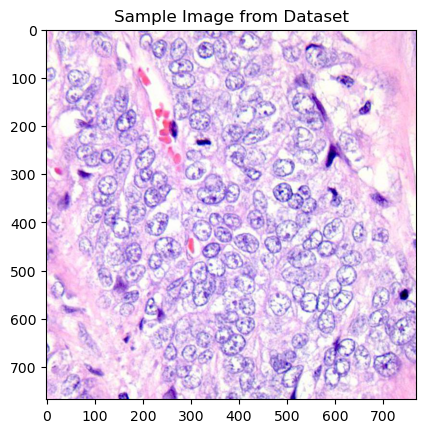

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display a JPEG image
image_path = "/Users/mmliu/Desktop/CISB62/CISB62_midterm_MandyLiu/data/cancer/colonca1.jpeg"  

# Read the image using matplotlib's image module
img = mpimg.imread(image_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image using imshow
ax.imshow(img)

# You can set a title if needed
ax.set_title("Sample Image from Dataset")

# Show the image
plt.show()

## Data preparation

In [7]:
# Create a Pandas Series from the file_paths list and assign the name 'filepaths' to this Series
Files = pd.Series(file_paths , name= 'filepaths')

# Create another Pandas Series from the labels list and assign the name 'labels' to this Series 
labels = pd.Series(labels ,name = 'labels' )

# Create a dataframe and concatenate the two Series horizontally along axis=1 (columns)
df = pd.concat([Files , labels] , axis = 1)

In [8]:
# Print the number of rows and columns of the dataframe
print('Number of rows: ', len(df))
print('Number of columns: ', len(df.columns))

Number of rows:  500
Number of columns:  2


In [9]:
# Display the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  500 non-null    object
 1   labels     500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [10]:
# Display the head
df.head()

,filepaths,labels
0,/Users/mmliu/Desktop/CISB62/CISB62_midterm_Man...,1
1,/Users/mmliu/Desktop/CISB62/CISB62_midterm_Man...,1
2,/Users/mmliu/Desktop/CISB62/CISB62_midterm_Man...,1
3,/Users/mmliu/Desktop/CISB62/CISB62_midterm_Man...,1
4,/Users/mmliu/Desktop/CISB62/CISB62_midterm_Man...,1


### Split the data

In [11]:
# X = image_files or List of file paths
# y = labels or List of corresponding labels (non-cancer: 0, cancer: 1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['filepaths'],df['labels'], test_size=0.2, random_state=35)

In [12]:
# Display the shape of the train_test_split data

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', X_train.shape)
print('y_test shape: ', X_test.shape)

X_train shape:  (400,)
X_test shape:  (100,)
y_train shape:  (400,)
y_test shape:  (100,)


### Determine the image height, width and number of channels

In [13]:
# Select a sample image from the dataset
sample_image_path = file_paths[0]  # Change the index to select a different image

# Load the sample image
sample_image = plt.imread(sample_image_path)

# Get the dimensions of the sample image
image_height, image_width, num_channels = sample_image.shape

print("Image Information\n")
print(f"Number of images: {len(data):,}")
print(f"Height: {image_height} pixels, width: {image_width} pixels, number of channels: {num_channels}\n")

Image Information

Number of images: 500
Height: 768 pixels, width: 768 pixels, number of channels: 3



## Design the Neural Network Architecture and train the model

In [14]:
# Create a Sequential model
model = keras.Sequential([
    layers.Input(shape=(image_height, image_width, num_channels)),# Image size is 768 X 768 with 3 channels
    layers.Flatten(),                                             # Flatten the layer for dense layer compatability 
    layers.Dense(32, activation='relu'),                          # 32 neurons hidden layer - learn patterns in data
    layers.Dense(16, activation='relu'),                          # 16 neurons hidden layer
    layers.Dense(1, activation='sigmoid')                         # Sigmoid activation for binary classification
])                                


In [15]:
# The model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1769472)           0         
                                                                 
 dense (Dense)               (None, 32)                56623136  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 56623681 (216.00 MB)
Trainable params: 56623681 (216.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Normalize pixel values and convert to NumPy arrays

In [17]:
# Prepare image data for the Deep Learning model by loading images, normalizing pixel values, 
# and converting them into NumPy arrays
# plt.imread is a function from the Matplotlib library that reads an image 
# and returns its pixel values as a NumPy array

X_train = np.array([plt.imread(image_path) for image_path in X_train]) / 255.0
X_test = np.array([plt.imread(image_path) for image_path in X_test]) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

### Train the model

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
25/25 [==============================] - 20s 757ms/step - loss: 58.6377 - accuracy: 0.4900 - val_loss: 70.1130 - val_accuracy: 0.4600
Epoch 2/10
25/25 [==============================] - 13s 515ms/step - loss: 49.1800 - accuracy: 0.4800 - val_loss: 7.0073 - val_accuracy: 0.4900
Epoch 3/10
25/25 [==============================] - 13s 511ms/step - loss: 9.1025 - accuracy: 0.5700 - val_loss: 1.5091 - val_accuracy: 0.6800
Epoch 4/10
25/25 [==============================] - 13s 502ms/step - loss: 4.8447 - accuracy: 0.6450 - val_loss: 17.5876 - val_accuracy: 0.5400
Epoch 5/10
25/25 [==============================] - 12s 495ms/step - loss: 28.5254 - accuracy: 0.5050 - val_loss: 20.1831 - val_accuracy: 0.4600
Epoch 6/10
25/25 [==============================] - 13s 499ms/step - loss: 5.5120 - accuracy: 0.6825 - val_loss: 2.4448 - val_accuracy: 0.7200
Epoch 7/10
25/25 [==============================] - 12s 497ms/step - loss: 4.2924 - accuracy: 0.6825 - val_loss: 5.4669 - val_accuracy: 

### Plot the model loss

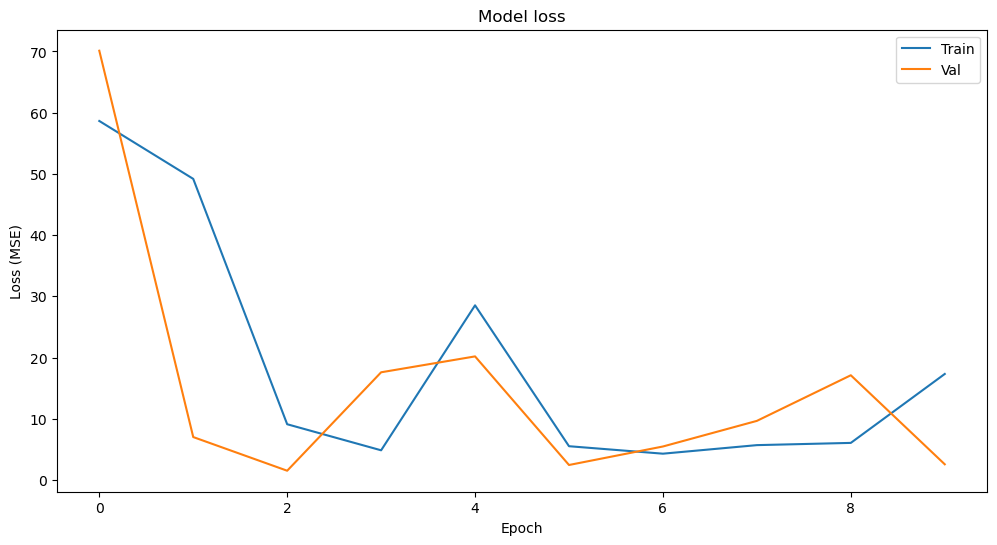

In [19]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(['Train', 'Val'], loc='upper right')

## Confusion Matrix

4/4 [==============================] - 0s 37ms/step


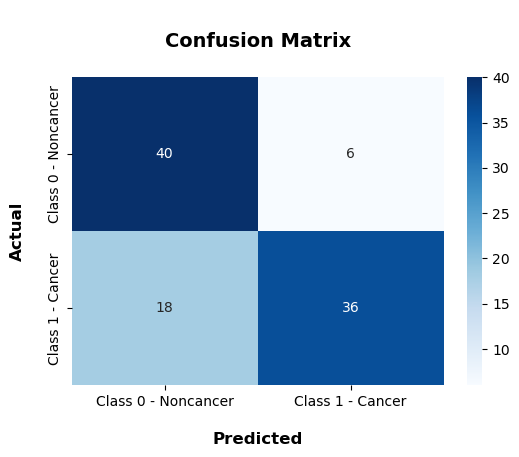

In [20]:
# Define Y_true and Y_pred_classes
Y_true = np.array(y_test)
Y_pred_classes = np.round(model.predict(X_test))

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0 - Noncancer', 'Class 1 - Cancer'],                                                   
            yticklabels=['Class 0 - Noncancer', 'Class 1 - Cancer'])

plt.xlabel('\nPredicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual\n', fontsize=12, fontweight='bold')
plt.title('\nConfusion Matrix\n', fontsize=14, fontweight='bold')
plt.show()


### The confusion matrix tells us that the model is 36% accurate at predicting cancer tissue images. At 6% of the time, it predicts it's cancer when it actually is noncancer tissue. 40% of the time it predicts noncancer images correctly. 18% of the time, it predicts it noncancer, but it is cancer.

## Find the number of incorrect predictions

In [21]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 29ms/step


In [22]:
images = X_test.reshape((100, 768, 768, 3))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [23]:
# Print the length of incorrection predictions

len(incorrect_predictions)

0

## Hyperparameters Tuning

In [24]:
import keras_tuner as kt

Using TensorFlow backend


In [25]:
import os
import shutil

# shutil module is part of the Python standard library and provides a 
# collection of utility functions for working with files and directories. 

folder_path = "my_dir/intro_to_kt/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'my_dir/intro_to_kt/' has been deleted.


In [26]:
def model_builder(hp):
    # Create model
    model = Sequential()
    
    # Tune the number of units in the first layer
    hp_units = hp.Int('units', min_value=4, max_value=20, step=4)
    
    # Add the first dense layer with the tuned number of units
    model.add(Dense(units=hp_units, activation='relu', input_shape=(768, 768, 3)))
    
    # Change the activation function in the output layer to 'linear' for regression
    model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adam')  # Use 'mean_squared_error' for regression
    
    return model


In [27]:
# Insttantiate the tuner and perform hypertuning

tuner = kt.Hyperband(model_builder, objective='val_accuracy',
                     max_epochs=10, factor=3, 
                     directory='my_dir',
                     project_name='intro_to_kt')

In [28]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [29]:
tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")

Trial 2 Complete [00h 01m 59s]

Best val_accuracy So Far: None
Total elapsed time: 00h 04m 24s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
12                |16                |units
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
10/10 [==============================] - 57s 5s/step - loss: 0.3590 - val_loss: 0.3286
Epoch 2/2
10/10 [==============================] - 45s 4s/step - loss: 0.3176 - val_loss: 0.2991


Traceback (most recent call last):
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 268, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 259, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 228, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 228, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 241, in convert_to_metrics_dict
    best_va

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 268, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/base_tuner.py", line 259, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 228, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 228, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 241, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/tuner_utils.py", line 212, in _get_best_value_and_best_epoch_from_history
    objective_value = objective.get_value(metrics)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mmliu/anaconda3/lib/python3.11/site-packages/keras_tuner/src/engine/objective.py", line 57, in get_value
    return logs[self.name]
           ~~~~^^^^^^^^^^^
KeyError: 'val_accuracy'


## Train the model

Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 10 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

hypermodel = tuner.hypermodel.build(best_hps)
Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
# hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
# hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

hypermodel = tuner.hypermodel.build(best_hps)

#retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
eval_result = hypermodel.evaluate(X_train, y_train)
print('[test loss, test accuracy]:', eval_result)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

In [ ]:
from sklearn.metrics import mean_absolute_error

# Let's check how much we are off on average
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

y_pred[0:5]

In [ ]:
mae

In [ ]:
y_pred[42]

In [ ]:
model.predict(np.reshape(X_test[42], [1, 14]))

Were the actual value and the predicted value the same?

# Save the model

model.save('Colon_Cancer_Classification.keras')